# 1- Initialisation

In [147]:
# Librairies pour le traitement des données
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *
from my_functions.machine_learning_common_functions import *

%matplotlib inline

low_memory=False # faible mémoire vive (RAM) pour gérer la lecture de gros fichiers

In [148]:
# Chargement des Data Sets
df15 = pd.read_csv('2015-building-energy-benchmarking.csv', low_memory=low_memory)
df16 = pd.read_csv('2016-building-energy-benchmarking.csv', low_memory=low_memory)

Le data set contient :
	- 3340 lignes et 47 colonnes.
	- 26512 valeurs manquantes, ce qui représente 16.89 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
17,23,2015,NonResidential,Hotel,RENAISSANCE MADISON HOTEL,942000430,"{'latitude': '47.60656003', 'longitude': '-122...",7,DOWNTOWN,1983,1,28.0,416281,85000,331281,"Hotel, Parking",Hotel,348329.0,Parking,85000.0,NaN,NaN,NaN,30.0,95.5,97.4,231.9,234.7,33270518.0,33922016.0,0.0,6427712.0,21932264.0,113392.0,11339166.0,0.0,755.12,1.59,No,NaN,Compliant,NaN,NaN,14.0,NaN,19.0,18379
235,357,2015,Nonresidential COS,Large Office,SEATTLE MUNICIPAL TOWER,942000720,"{'latitude': '47.60491077', 'longitude': '-122...",3,DOWNTOWN,1990,1,63.0,1195387,159600,1035787,"Office, Other, Parking",Office,1187924.0,Parking,159599.0,Other,18656.0,"2014, 2013, 2011, 2010, 2009, 2008, 2007",82.0,53.6,54.6,168.4,171.3,64715652.0,65842744.0,0.0,18960680.0,64696526.0,218.0,21804.0,0.0,452.16,0.15,No,NaN,Compliant,NaN,NaN,14.0,NaN,19.0,18379


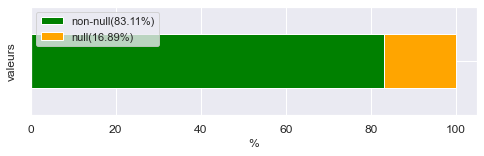

In [149]:
# Vérification de la structure du Data Set
verifier_taille(df15)
afficher_echantillon(df15)

Le data set contient :
	- 3376 lignes et 46 colonnes.
	- 19952 valeurs manquantes, ce qui représente 12.85 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
149,238,2016,Nonresidential COS,Small- and Mid-Sized Office,North Service Center,1300 N 97th ST,Seattle,WA,98103.0,4310701070,5,NORTHWEST,47.70044,-122.34136,1957,1.0,2,91130,0,91130,"Data Center, Distribution Center, Office, Othe...",Office,57968.0,Distribution Center,32881.0,Parking,11850.0,NaN,NaN,100.500000,106.099998,262.700012,272.200012,9472358.0,10005492.0,0.0,2079127.75,7093984.0,23783.73047,2378373.0,False,NaN,Compliant,NaN,175.77,1.93
628,847,2016,NonResidential,Warehouse,Pioneer Industries,7000 Highland Parkway SW,Seattle,WA,98106.0,3024049003,1,DELRIDGE,47.53935,-122.34402,1970,1.0,1,70400,0,70400,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,58047.0,Office,12353.0,NaN,NaN,NaN,1.0,198.300003,200.699997,502.700012,505.100006,13962749.0,14128860.0,0.0,2906502.75,9916987.0,40457.60938,4045761.0,False,NaN,Compliant,NaN,284.01,4.03


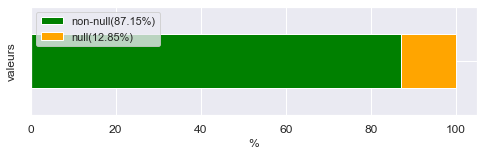

In [150]:
# Vérification de la structure du Data Set
verifier_taille(df16)
afficher_echantillon(df16)

In [151]:
nans = nan_cols(df15, 80)
nans # Affichage des colonnes trouvées

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,ThirdLargestPropertyUseType,2780,83.23,560,16.77
1,ThirdLargestPropertyUseTypeGFA,2780,83.23,560,16.77
2,YearsENERGYSTARCertified,3230,96.71,110,3.29
3,Comment,3327,99.61,13,0.39
4,Outlier,3256,97.49,84,2.51
5,2010 Census Tracts,3116,93.29,224,6.71
6,City Council Districts,3127,93.62,213,6.38


In [152]:
nans = nan_cols(df16,80) 
nans # Affichage des colonnes trouvées

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,ThirdLargestPropertyUseType,2780,82.35,596,17.65
1,ThirdLargestPropertyUseTypeGFA,2780,82.35,596,17.65
2,YearsENERGYSTARCertified,3257,96.48,119,3.52
3,Comments,3376,100.00,0,0.00
4,Outlier,3344,99.05,32,0.95


In [153]:
df15.Outlier.unique()

array([nan, 'High Outlier', 'Low Outlier'], dtype=object)

In [154]:
doublons(df15['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

In [155]:
doublons(df16['OSEBuildingID'])

Series([], Name: OSEBuildingID, dtype: int64)

# Data Simplification & Cleanning

In [156]:
df15s = df15[['OSEBuildingID',	'BuildingType',	'PrimaryPropertyType',	'PropertyName',	'PropertyGFATotal', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'GHGEmissions(MetricTonsCO2e)', 'CouncilDistrictCode',	'Neighborhood',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'ComplianceStatus', 'Outlier']]
df15s['SiteEUI(kBtu)'] = df15['SiteEUI(kBtu/sf)']*df15['PropertyGFATotal']
df15s

C:\Users\Shadow\AppData\Local\Temp/ipykernel_27584/1686419515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15s['SiteEUI(kBtu)'] = df15['SiteEUI(kBtu/sf)']*df15['PropertyGFATotal']


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,SiteEUI(kBtu)
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,65.0,78.9,249.43,7,DOWNTOWN,1927,1,12.0,Compliant,NaN,6977442.6
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,51.0,94.4,263.51,7,DOWNTOWN,1996,1,11.0,Compliant,NaN,9776630.4
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,18.0,96.6,2061.48,7,DOWNTOWN,1969,1,41.0,Compliant,NaN,92928234.0
3,5,NonResidential,Hotel,HOTEL MAX,61320,1.0,460.4,1936.34,7,DOWNTOWN,1926,1,10.0,Compliant,High Outlier,28231728.0
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,67.0,120.1,507.70,7,DOWNTOWN,1980,1,18.0,Compliant,NaN,14398789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,44650,71.0,25.6,7.97,2,DOWNTOWN,2000,1,4.0,Compliant,NaN,1143040.0
3336,50055,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,42393,98.0,48.6,30.69,4,NORTHEAST,2014,1,7.0,Compliant,NaN,2060299.8
3337,50057,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,319481,79.0,52.7,627.97,7,DOWNTOWN,2015,1,40.0,Compliant,NaN,16836648.7
3338,50058,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,48230,44.0,34.8,5.42,4,NORTHEAST,1981,1,3.0,Compliant,NaN,1678404.0


In [157]:
df15s['ComplianceStatus'].unique()

array(['Compliant', 'Not Compliant'], dtype=object)

In [158]:
df15s[df15s['ComplianceStatus']=='Not Compliant']

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,ComplianceStatus,Outlier,SiteEUI(kBtu)
767,19798,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,33166,NaN,NaN,NaN,4,NORTHEAST,1977,1,3.0,Not Compliant,NaN,NaN
1346,21548,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,40086,NaN,NaN,NaN,7,MAGNOLIA / QUEEN ANNE,1967,1,4.0,Not Compliant,NaN,NaN
1838,23508,Multifamily LR (1-4),Low-Rise Multifamily,SEAVIEW CONDOMINIUM,53040,NaN,NaN,NaN,7,MAGNOLIA / QUEEN ANNE,1930,1,3.0,Not Compliant,NaN,NaN


In [159]:
df15s = df15s[df15s['ComplianceStatus']=='Compliant']
df15s = df15s.drop(columns=['ComplianceStatus'])
df15s

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,SiteEUI(kBtu)
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,65.0,78.9,249.43,7,DOWNTOWN,1927,1,12.0,NaN,6977442.6
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,51.0,94.4,263.51,7,DOWNTOWN,1996,1,11.0,NaN,9776630.4
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,18.0,96.6,2061.48,7,DOWNTOWN,1969,1,41.0,NaN,92928234.0
3,5,NonResidential,Hotel,HOTEL MAX,61320,1.0,460.4,1936.34,7,DOWNTOWN,1926,1,10.0,High Outlier,28231728.0
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,67.0,120.1,507.70,7,DOWNTOWN,1980,1,18.0,NaN,14398789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,44650,71.0,25.6,7.97,2,DOWNTOWN,2000,1,4.0,NaN,1143040.0
3336,50055,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,42393,98.0,48.6,30.69,4,NORTHEAST,2014,1,7.0,NaN,2060299.8
3337,50057,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,319481,79.0,52.7,627.97,7,DOWNTOWN,2015,1,40.0,NaN,16836648.7
3338,50058,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,48230,44.0,34.8,5.42,4,NORTHEAST,1981,1,3.0,NaN,1678404.0


In [160]:
df15s[df15s['SiteEUI(kBtu/sf)'].isnull()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,SiteEUI(kBtu)
62,87,SPS-District K-12,K-12 School,ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT),53352,NaN,NaN,NaN,1,SOUTHWEST,1948,1,2.0,Low Outlier,NaN
719,19694,SPS-District K-12,K-12 School,MANN (SPS-DISTRICT),37327,NaN,NaN,NaN,3,CENTRAL,1925,1,2.0,NaN,NaN
1358,21570,SPS-District K-12,K-12 School,PINEHURST ELEMENTARY (SPS-DISTRICT),34005,NaN,NaN,NaN,5,NORTH,1950,1,1.0,NaN,NaN
1360,21578,SPS-District K-12,K-12 School,GENESEE SCHOOL (SPS-DISTRICT),41221,NaN,NaN,NaN,1,SOUTHWEST,1949,1,1.0,Low Outlier,NaN
2108,24408,SPS-District K-12,K-12 School,WILSON-PACIFIC (SPS-DISTRICT),110830,NaN,NaN,NaN,5,NORTHWEST,1953,1,1.0,NaN,NaN
2381,25361,SPS-District K-12,K-12 School,DECATUR ELEMENTARY (SPS-DISTRICT),43578,NaN,NaN,NaN,4,NORTHEAST,1961,1,1.0,NaN,NaN
2406,25451,NonResidential,Restaurant\n,YALE STREET LANDING,26519,NaN,NaN,NaN,3,LAKE UNION,1978,1,2.0,NaN,NaN


In [161]:
nans = valeurs_manquantes(df15s[['SiteEUI(kBtu/sf)',	'GHGEmissions(MetricTonsCO2e)']])
nans

,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e)
62,NaN,NaN
719,NaN,NaN
1358,NaN,NaN
1360,NaN,NaN
2108,NaN,NaN
2381,NaN,NaN
2406,NaN,NaN


In [162]:
df15s = df15s.drop(index=nans.index)
valeurs_manquantes(df15s[['SiteEUI(kBtu/sf)',	'GHGEmissions(MetricTonsCO2e)']])

,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e)


In [163]:
nans = df15s[df15s['NumberofFloors'].isnull()]

In [164]:
df15s = df15s.drop(index=nans.index)
df15s[df15s['NumberofFloors'].isnull()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,SiteEUI(kBtu)


Le data set contient :
	- 3322 lignes et 15 colonnes.
	- 4005 valeurs manquantes, ce qui représente 8.04 % du data set.
Voici un sous-échantillon aléatoire :


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,SiteEUI(kBtu)
1595,22550,Multifamily LR (1-4),Low-Rise Multifamily,GOLFCREST APARTMENTS,28674,89.0,24.2,8.81,7,MAGNOLIA / QUEEN ANNE,1963,1,4.0,NaN,693910.8
576,769,NonResidential,Small- and Mid-Sized Office,UNITED WAY,52298,88.0,39.6,13.88,7,DOWNTOWN,1921,1,3.0,NaN,2071000.8


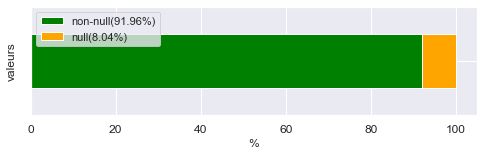

In [165]:
# Vérification de la structure du Data Set
verifier_taille(df15s)
afficher_echantillon(df15s)

In [166]:
nan_cols(df15s)

,Column,#NaN,%NaN,#Not_NaN,%Not_NaN
0,OSEBuildingID,0,0.00,3322,100.00
1,BuildingType,0,0.00,3322,100.00
2,PrimaryPropertyType,0,0.00,3322,100.00
3,PropertyName,0,0.00,3322,100.00
4,PropertyGFATotal,0,0.00,3322,100.00
5,ENERGYSTARScore,765,23.03,2557,76.97
6,SiteEUI(kBtu/sf),0,0.00,3322,100.00
7,GHGEmissions(MetricTonsCO2e),0,0.00,3322,100.00
8,CouncilDistrictCode,0,0.00,3322,100.00
9,Neighborhood,0,0.00,3322,100.00


In [167]:
valeurs_manquantes(df15s)

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,SiteEUI(kBtu)
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,65.0,78.9,249.43,7,DOWNTOWN,1927,1,12.0,NaN,6977442.6
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,51.0,94.4,263.51,7,DOWNTOWN,1996,1,11.0,NaN,9776630.4
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,18.0,96.6,2061.48,7,DOWNTOWN,1969,1,41.0,NaN,92928234.0
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,67.0,120.1,507.70,7,DOWNTOWN,1980,1,18.0,NaN,14398789.0
5,9,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),97288,NaN,135.7,304.62,7,DOWNTOWN,1999,1,2.0,NaN,13201981.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,44650,71.0,25.6,7.97,2,DOWNTOWN,2000,1,4.0,NaN,1143040.0
3336,50055,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,42393,98.0,48.6,30.69,4,NORTHEAST,2014,1,7.0,NaN,2060299.8
3337,50057,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,319481,79.0,52.7,627.97,7,DOWNTOWN,2015,1,40.0,NaN,16836648.7
3338,50058,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,48230,44.0,34.8,5.42,4,NORTHEAST,1981,1,3.0,NaN,1678404.0


# Analyse Explo

In [168]:
df15s.describe()

,OSEBuildingID,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,SiteEUI(kBtu)
count,3322.000000,3.322000e+03,2557.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03
mean,20470.584889,9.075498e+04,67.918264,53.603371,109.780199,4.455750,1967.676099,1.031306,4.690247,5.727766e+06
std,11480.009528,1.494017e+05,27.153061,53.918346,409.665889,2.128229,32.969156,0.764057,5.464409,1.503315e+07
min,1.000000,2.000000e+04,1.000000,0.000000,0.000000,1.000000,1900.000000,1.000000,0.000000,0.000000e+00
25%,19920.250000,2.847050e+04,52.000000,27.300000,9.260000,3.000000,1947.000000,1.000000,2.000000,9.599253e+05
50%,22961.500000,4.398350e+04,76.000000,37.400000,32.705000,4.000000,1974.000000,1.000000,4.000000,1.883254e+06
75%,25743.750000,8.843200e+04,90.000000,59.800000,88.537500,7.000000,1996.000000,1.000000,5.000000,4.557881e+06
max,50059.000000,2.200000e+06,100.000000,800.600000,11824.890000,7.000000,2015.000000,39.000000,99.000000,3.088682e+08


In [169]:
Cols = ['PropertyGFATotal',	'ENERGYSTARScore',	'SiteEUI(kBtu)',	'GHGEmissions(MetricTonsCO2e)',	'CouncilDistrictCode',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors']

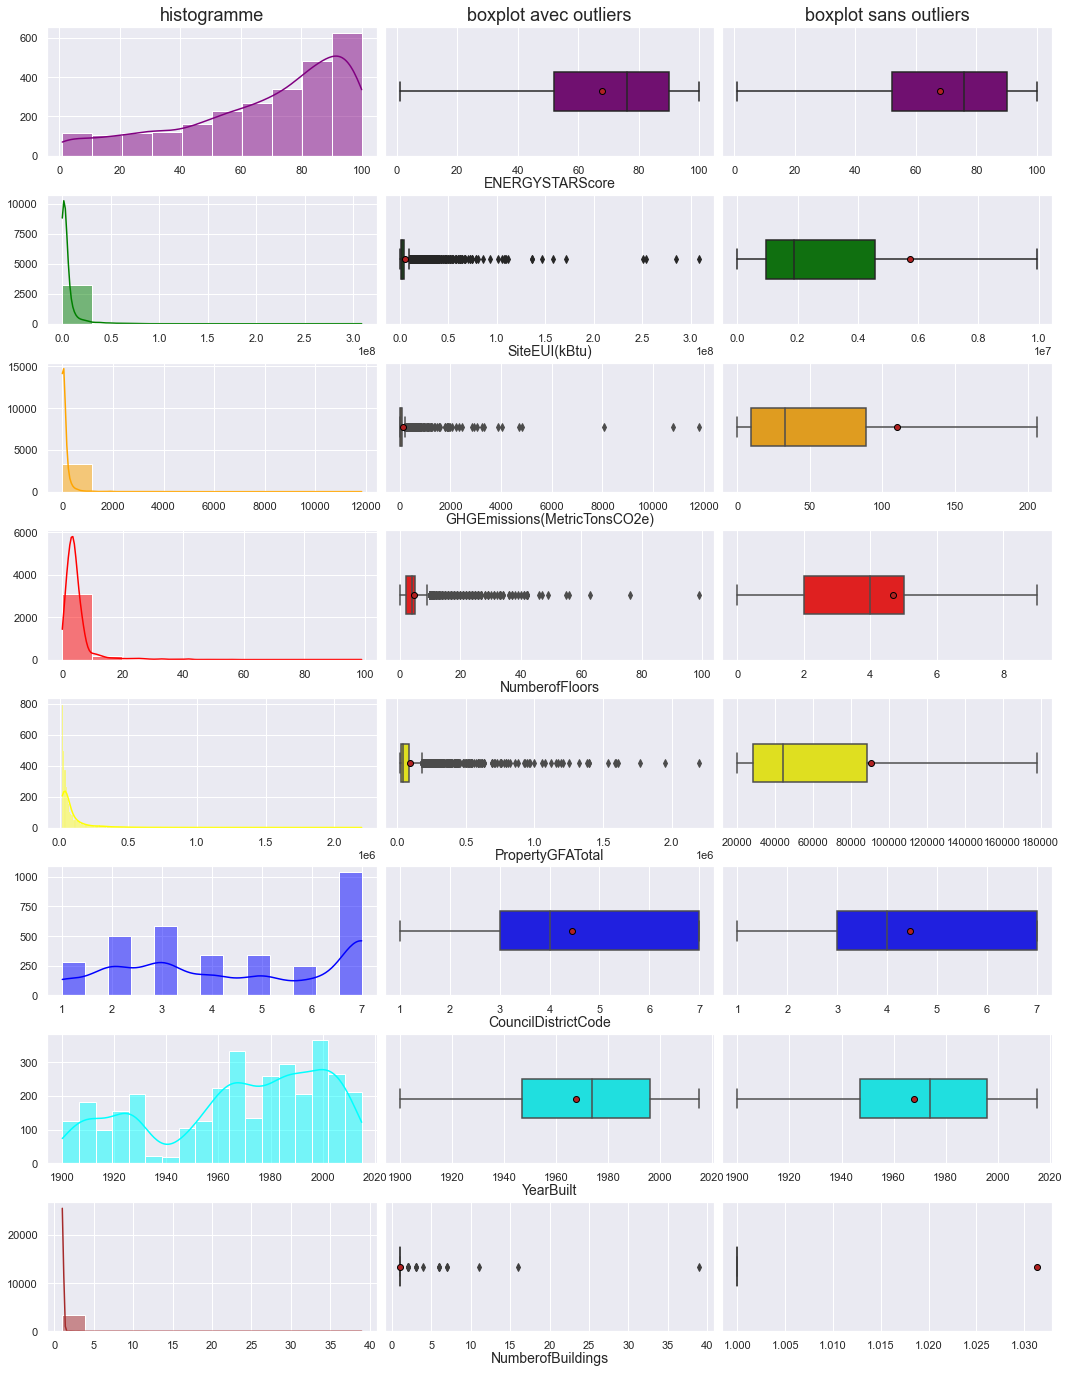

In [170]:
histo_distribution(df15s[Cols])

In [171]:
df15s[df15s['GHGEmissions(MetricTonsCO2e)'] > 200]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,Outlier,SiteEUI(kBtu)
0,1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,88434,65.0,78.9,249.43,7,DOWNTOWN,1927,1,12.0,NaN,6977442.6
1,2,NonResidential,Hotel,PARAMOUNT HOTEL,103566,51.0,94.4,263.51,7,DOWNTOWN,1996,1,11.0,NaN,9776630.4
2,3,NonResidential,Hotel,WESTIN HOTEL,961990,18.0,96.6,2061.48,7,DOWNTOWN,1969,1,41.0,NaN,92928234.0
3,5,NonResidential,Hotel,HOTEL MAX,61320,1.0,460.4,1936.34,7,DOWNTOWN,1926,1,10.0,High Outlier,28231728.0
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,119890,67.0,120.1,507.70,7,DOWNTOWN,1980,1,18.0,NaN,14398789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,49926,NonResidential,College/University,SEATTLE COLLEGE CENTRAL - EDISON BLDG/BROADWAY...,428347,NaN,77.0,1253.31,3,EAST,1925,1,3.0,NaN,32982719.0
3305,49940,NonResidential,Hospital,VIRGINIA MASON- CENTRAL PAVILLION,374466,97.0,210.0,3894.01,3,EAST,1920,1,8.0,NaN,78637860.0
3314,49985,NonResidential,Large Office,AMAZON - PHASE VI,427181,99.0,39.2,210.69,7,LAKE UNION,2014,1,6.0,NaN,16745495.2
3315,49992,Multifamily HR (10+),High-Rise Multifamily,STADIUM PLACE (THE WAVE & THE NOLO),619416,94.0,47.8,587.09,2,DOWNTOWN,2014,1,26.0,NaN,29608084.8


In [172]:
# afficher_correlations(df15s[df15s['PrimaryPropertyType']=='Hospital'], variables=Cols)

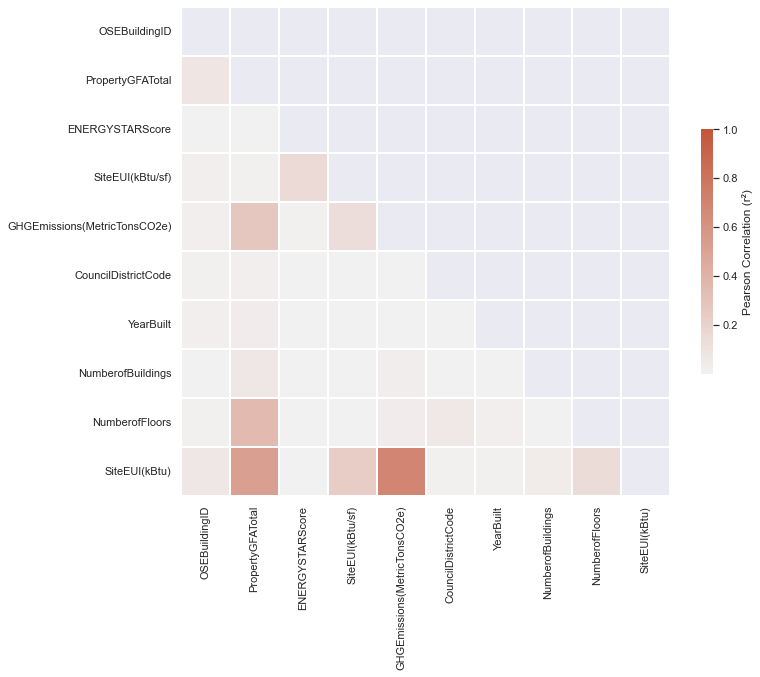

In [173]:
correlation_matrix(df15s)

# Learning

In [181]:
XCols = ['PropertyGFATotal', 'CouncilDistrictCode',	'YearBuilt',	'NumberofBuildings',	'NumberofFloors', 'SiteEUI(kBtu)']
X = Std_Scaled(df15s[XCols], frame=True)
y = 'SiteEUI(kBtu)'

X_train, X_test, y_train, y_test = trainning_sets(X, y)

In [182]:
valeurs_manquantes(X)

,PropertyGFATotal,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,SiteEUI(kBtu)


In [183]:
X_train

,PropertyGFATotal,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors
1463,-0.405137,1.195658,0.889568,-0.04098,0.056694
11,1.622857,1.195658,0.919904,-0.04098,3.717294
1010,-0.437009,-0.684122,-1.446300,-0.04098,-0.309366
231,6.913145,1.195658,0.040162,-0.04098,8.110013
863,-0.359253,1.195658,1.192928,-0.04098,-0.126336
...,...,...,...,...,...
2874,-0.420212,-1.154067,-0.141854,-0.04098,-0.309366
2898,0.207646,-1.154067,1.344608,-0.04098,0.056694
1930,-0.380930,0.255768,0.343521,-0.04098,-0.492396
1579,-0.448704,1.195658,0.009826,-0.04098,-0.126336


In [184]:
y_train

1463   -0.317500
11      1.443203
1010   -0.308019
231     3.729731
863    -0.314442
          ...   
2874   -0.314229
2898   -0.173668
1930   -0.324762
1579   -0.346653
3055   -0.202028
Name: SiteEUI(kBtu), Length: 2657, dtype: float64

## Baselines

RMSE : 0.87


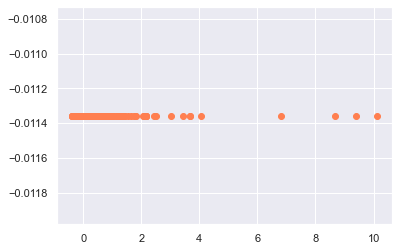

In [185]:
from sklearn import dummy, metrics
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test)

# Evaluate
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)) ))
plt.scatter(y_test, y_pred_dum, color='coral')


## Naive KNN Regressor

RMSE : 0.47


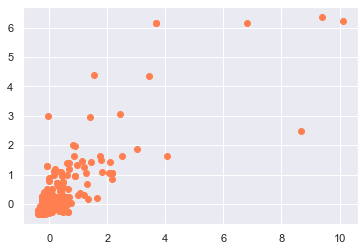

In [186]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred))))
plt.scatter(y_test, y_pred, color='coral')

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 9}

Sur le jeu de test : 0.220


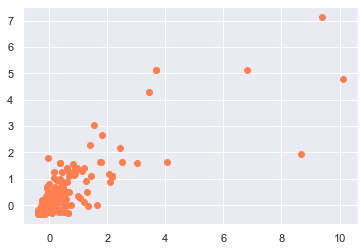

In [187]:
#-------------------------- GridSearchCV --------------------------
from sklearn import neighbors, model_selection

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
# score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    # scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
# print("Résultats de la validation croisée :")
# for mean, std, params in zip(
#         clf.cv_results_['mean_test_score'], # score moyen
#         clf.cv_results_['std_test_score'],  # écart-type du score
#         clf.cv_results_['params']           # valeur de l'hyperparamètre
#     ):

    # print("{} = {:.3f} (+/-{:.03f}) for {}".format(
    #     score,
    #     mean,
    #     std*2,
    #     params
    # ) )
    
y_pred = clf.predict(X_test)
print("\nSur le jeu de test : {:.3f}".format(metrics.mean_squared_error(y_test, y_pred)))
plt.scatter(y_test, y_pred, color='coral')